In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("soccer21-22.csv")
df['HomeResult'] = df.apply(lambda x: "Win" if x.FTR == 'H' else "Loss" if x.FTR == 'A' else "Draw",
      axis=1)
df['AwayResult'] = df.apply(lambda x: "Win" if x.FTR == 'A' else "Loss" if x.FTR == 'H' else "Draw",
      axis=1)
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HF,AF,HC,AC,HY,AY,HR,AR,HomeResult,AwayResult
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,12,8,2,5,0,0,0,0,Win,Loss
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,11,9,5,4,1,2,0,0,Win,Loss
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,10,7,7,6,2,1,0,0,Loss,Win
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,15,11,5,2,0,0,0,0,Win,Loss
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,13,15,6,8,2,0,0,0,Win,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,Crystal Palace,Man United,1,0,H,1,0,H,M Atkinson,...,12,22,3,6,2,4,0,0,Win,Loss
376,22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,...,10,5,3,3,0,1,0,0,Win,Loss
377,22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,...,6,3,5,3,1,0,0,0,Win,Loss
378,22/05/2022,Man City,Aston Villa,3,2,H,0,1,A,M Oliver,...,5,11,13,1,0,1,0,0,Win,Loss


In [4]:
#Goal 1 find the team with the most fouls
home_fouls = df.groupby(by='HomeTeam')['HF'].sum()
away_fouls = df.groupby(by='AwayTeam')['AF'].sum()
fouls = home_fouls + away_fouls
team = fouls.sort_values(ascending=False).index[0]
total_fouls = fouls.sort_values(ascending=False)[0]
print(team + ": ", total_fouls)

Leeds:  469


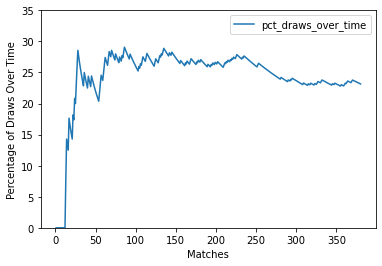

In [5]:
#Goal 2 plot percentage of games drawn over time
draws = df['HomeResult'] == "Draw"
matches = range(1, len(df.Date)+1)
pct_draws_over_time = (draws.cumsum() / matches) * 100
data = {'Matches':matches, 'pct_draws_over_time':pct_draws_over_time}
drawDF = pd.DataFrame(data, columns = ['Matches', 'pct_draws_over_time'])

plot = drawDF.plot(x ='Matches', y='pct_draws_over_time', kind = 'line')
plot.set_ylim((0, 35))
plot.set_xlabel("Matches")
plot.set_ylabel("Percentage of Draws Over Time")
plt.show()

In [15]:
#Goal 3 how do redcards impact the chance of winning 
#want to find probability of winning vs. probability of winning given any red card
df['HomeRed?'] = df['HR'] > 0
df['AwayRed?'] = df['AR'] > 0
reds = df.groupby(by="HomeTeam")['HomeRed?'].sum() + df.groupby(by="AwayTeam")['AwayRed?'].sum()
redProb = reds/38


df['HW'] = df['HomeResult'] == "Win"
df['AW'] = df['AwayResult'] == "Win"
wins = df.groupby(by="HomeTeam")['HW'].sum() + df.groupby(by="AwayTeam")['AW'].sum()
winProb = wins/38


df['HRWinChance'] = (df['HomeRed?']) & (df['HomeResult'] == "Win")
df['ARWinChance'] = (df['AwayRed?']) & (df['AwayResult'] == "Win")
red_wins = df.groupby(by="HomeTeam")['HRWinChance'].sum() + df.groupby(by="AwayTeam")['ARWinChance'].sum()
redWinProb = (red_wins/38) / redProb

print(redWinProb, "\n\n", winProb)


#in this particular season 3 teams managed to win 1 game whilst getting at least red card
#interestingly Brentford's win probability was almost identical whether or not they got a red card
#what I did here is calculate P(win|at least 1 red card)

HomeTeam
Arsenal           0.250000
Aston Villa       0.000000
Brentford         0.333333
Brighton          0.000000
Burnley           0.000000
Chelsea           0.000000
Crystal Palace    0.000000
Everton           0.200000
Leeds             0.000000
Leicester         0.000000
Liverpool         0.000000
Man City          0.000000
Man United        0.000000
Newcastle         0.000000
Norwich           0.000000
Southampton       0.000000
Tottenham         0.000000
Watford           0.000000
West Ham          0.000000
Wolves            0.000000
dtype: float64 

 HomeTeam
Arsenal           0.578947
Aston Villa       0.342105
Brentford         0.342105
Brighton          0.315789
Burnley           0.184211
Chelsea           0.552632
Crystal Palace    0.289474
Everton           0.289474
Leeds             0.236842
Leicester         0.368421
Liverpool         0.736842
Man City          0.763158
Man United        0.421053
Newcastle         0.342105
Norwich           0.131579
Southampton       0